# **Week 11 Activity**

*A local school district has a goal to reach a 95% graduation rate by the end of the decade by identifying students who need intervention before they drop out of school. As a software engineer contacted by the school district, your task is to model the factors that predict how likely a student is to pass their high school final exam, by constructing an intervention system that leverages supervised learning techniques. The board of supervisors has asked that you find the most effective model that uses the least amount of computation costs to save on the budget. You will need to analyze the dataset on students' performance and develop a model that will predict a given student will pass, quantifying whether an intervention is necessary.*

This dataset has the following attributes:

>`school`    : student's school (binary: "GP" or "MS") \
`sex`        : student's sex (binary: "F" - female or "M" - male) \
`age`        : student's age (numeric: from 15 to 22) \
`address`    : student's home address type (binary: "U" - urban or "R" - rural) \
`famsize`    : family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3) \
`Pstatus`    : parent's cohabitation status (binary: "T" - living together or "A" - apart) \
`Medu`       : mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education) \
`Fedu`       : father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education) \
`Mjob`       : mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other") \
`Fjob`       : father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other") \
`reason`     : reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other") \
`guardian`   : student's guardian (nominal: "mother", "father" or "other") \
`traveltime` : home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) \
`studytime`  : weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) \
`failures`   : number of past class failures (numeric: n if 1<=n<3, else 4) \
`schoolsup`  : extra educational support (binary: yes or no) \
`famsup`     : family educational support (binary: yes or no) \
`paid`       : extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) \
`activities` : extra-curricular activities (binary: yes or no) \
`nursery`    : attended nursery school (binary: yes or no) \
`higher`     : wants to take higher education (binary: yes or no) \
`internet`   : Internet access at home (binary: yes or no) \
`romantic`   : with a romantic relationship (binary: yes or no) \
`famrel`     : quality of family relationships (numeric: from 1 - very bad to 5 - excellent) \
`freetime`   : free time after school (numeric: from 1 - very low to 5 - very high) \
`goout`      : going out with friends (numeric: from 1 - very low to 5 - very high) \
`Dalc`       : workday alcohol consumption (numeric: from 1 - very low to 5 - very high) \
`Walc`       : weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) \
`health`     : current health status (numeric: from 1 - very bad to 5 - very good) \
`absences`   : number of school absences (numeric: from 0 to 93) \
`passed`     : did the student pass the final exam (binary: yes or no) \

# importing libraries

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from six import StringIO
import pydotplus

# reading data

In [2]:
# reading data
df = pd.read_csv('student-data.csv')
data = df

In [3]:
df.shape

(395, 31)

In [4]:
data.isnull().values.any()

False

In [5]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [6]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [7]:
data.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
passed         2
dtype: int64

In [8]:
data.drop(["school","age"], axis=1, inplace=True) 
#dropping school name and age feature because it is not a computational value

In [9]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0
Walc,395.0,2.291139,1.287897,1.0,1.0,2.0,3.0,5.0


Some insights of the stats above:

>*traveltime*: Some kids travel 4 Hours a day just to reach school!

>*famrel*: Kids on average have a good relationship with their family.

>*absences*: Kids on average have only 6 days of absence, and we spot outliers with 75 days absences.

>*studytime*: Kids on average study for 2 hours.

In [10]:
# preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    object
 1   address     395 non-null    object
 2   famsize     395 non-null    object
 3   Pstatus     395 non-null    object
 4   Medu        395 non-null    int64 
 5   Fedu        395 non-null    int64 
 6   Mjob        395 non-null    object
 7   Fjob        395 non-null    object
 8   reason      395 non-null    object
 9   guardian    395 non-null    object
 10  traveltime  395 non-null    int64 
 11  studytime   395 non-null    int64 
 12  failures    395 non-null    int64 
 13  schoolsup   395 non-null    object
 14  famsup      395 non-null    object
 15  paid        395 non-null    object
 16  activities  395 non-null    object
 17  nursery     395 non-null    object
 18  higher      395 non-null    object
 19  internet    395 non-null    object
 20  romantic  

# Checking for outliers using box plot

In [11]:
col = list(df.columns)
int64_col = [i for i in col if (df[i].dtype == 'int64')]
print(int64_col)

['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


In [12]:
df1 = pd.DataFrame(data = df, columns = int64_col)

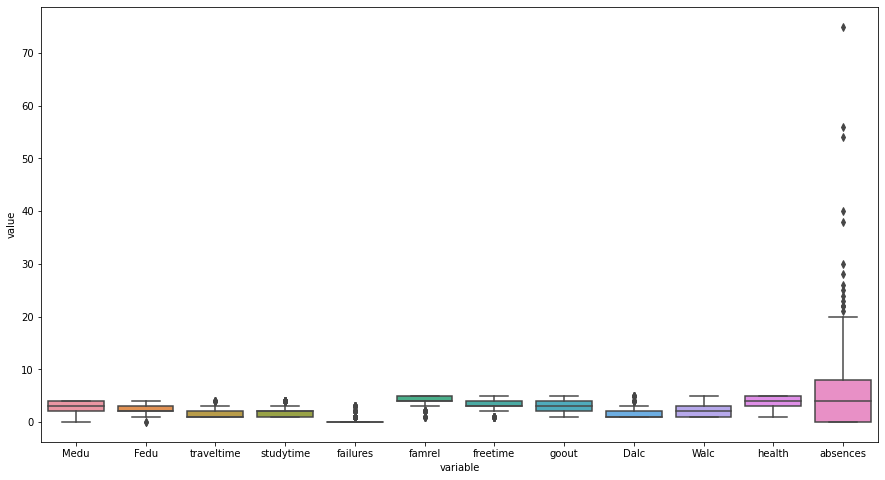

In [13]:
plt.figure(figsize=(15,8))
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()

# Mapping values 
## converting categorical values into numerical values

In [14]:
# for yes / no values:
d = {'yes': 1, 'no': 0}
data['schoolsup'] = data['schoolsup'].map(d)
data['famsup'] = data['famsup'].map(d)
data['paid'] = data['paid'].map(d)
data['activities'] = data['activities'].map(d)
data['nursery'] = data['nursery'].map(d)
data['higher'] = data['higher'].map(d)
data['internet'] = data['internet'].map(d)
data['romantic'] = data['romantic'].map(d)

# target -> passed column (mapping)
data['passed'] = data['passed'].map(d)

In [15]:
data.head()

,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,F,U,GT3,A,4,4,at_home,teacher,course,mother,...,0,0,4,3,4,1,1,3,6,0
1,F,U,GT3,T,1,1,at_home,other,course,father,...,1,0,5,3,3,1,1,3,4,0
2,F,U,LE3,T,1,1,at_home,other,other,mother,...,1,0,4,3,2,2,3,3,10,1
3,F,U,GT3,T,4,2,health,services,home,mother,...,1,1,3,2,2,1,1,5,2,1
4,F,U,GT3,T,3,3,other,other,home,father,...,0,0,4,3,2,1,2,5,4,1


In [16]:
# map the sex data
d = {'F': 1, 'M': 0}
data['sex'] = data['sex'].map(d)

# map the address data
d = {'U': 1, 'R': 0}
data['address'] = data['address'].map(d)

# map the famili size data
d = {'LE3': 1, 'GT3': 0}
data['famsize'] = data['famsize'].map(d)

# map the parent's status
d = {'T': 1, 'A': 0}
data['Pstatus'] = data['Pstatus'].map(d)

# map the parent's job
d = {'teacher': 0, 'health': 1, 'services': 2,'at_home': 3,'other': 4}
data['Mjob'] = data['Mjob'].map(d)
data['Fjob'] = data['Fjob'].map(d)

# map the reason data
d = {'home': 0, 'reputation': 1, 'course': 2,'other': 3}
data['reason'] = data['reason'].map(d)

# map the guardian data
d = {'mother': 0, 'father': 1, 'other': 2}
data['guardian'] = data['guardian'].map(d)

In [17]:
data.head()

,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,1,1,0,0,4,4,3,0,2,0,...,0,0,4,3,4,1,1,3,6,0
1,1,1,0,1,1,1,3,4,2,1,...,1,0,5,3,3,1,1,3,4,0
2,1,1,1,1,1,1,3,4,3,0,...,1,0,4,3,2,2,3,3,10,1
3,1,1,0,1,4,2,1,2,0,0,...,1,1,3,2,2,1,1,5,2,1
4,1,1,0,1,3,3,4,4,0,1,...,0,0,4,3,2,1,2,5,4,1


In [18]:
bool(list(df.nunique()) == list(data.nunique()))
# Checking to make sure that we have done the mapping successfully.

True

In [19]:
# removing 'passed' column
student_features = data.columns.tolist()
student_features.remove('passed') 
student_features

['sex',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences']

In [20]:
# copying features to X
X = data[student_features].copy()
X.columns

Index(['sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences'],
      dtype='object')

In [21]:
# copying target to Y
y = data[['passed']].copy()
y

,passed
0,0
1,0
2,1
3,1
4,1
...,...
390,0
391,1
392,0
393,1


## Train Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)

In [23]:
pass_classifier = tree.DecisionTreeClassifier(max_leaf_nodes=len(X.columns), random_state=0)
pass_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=28, random_state=0)

In [24]:
# Creating prediction
predictions = pass_classifier.predict(X_test)

In [25]:
# Measuring accuracy of the classifier
accuracy_score(y_true = y_test, y_pred = predictions)

0.7

Accuracy score of the classifier is 0.7, which can be further improved by tuning hyperparameters.